TASK 5: DECISION TREES AND RANDOM FORESTS

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import graphviz

In [ ]:
# 1. Load and check the dataset
data = pd.read_csv('heart.csv')
print(data.head())
print(data.info())
print(data.duplicated().sum())  

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [ ]:
# 2.Remove duplicates rows
data = data.drop_duplicates()

# 3.Separate features and target
X = data.drop('target', axis=1)
y = data['target']

In [5]:
# 4. Split data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
# 6. Visualize the tree 
dot_data = export_graphviz(clf, feature_names=X.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

In [12]:
# 7. Analyze overfitting by varying tree depth
depths = [2, 3, 5, 10]
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Depth {depth}: Train Acc={train_acc:.3f}, Test Acc={test_acc:.3f}")

Depth 2: Train Acc=0.784, Test Acc=0.656
Depth 3: Train Acc=0.859, Test Acc=0.803
Depth 5: Train Acc=0.942, Test Acc=0.770
Depth 10: Train Acc=1.000, Test Acc=0.803


In [8]:
# 8. Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Train Accuracy:", accuracy_score(y_train, rf.predict(X_train)))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.7540983606557377


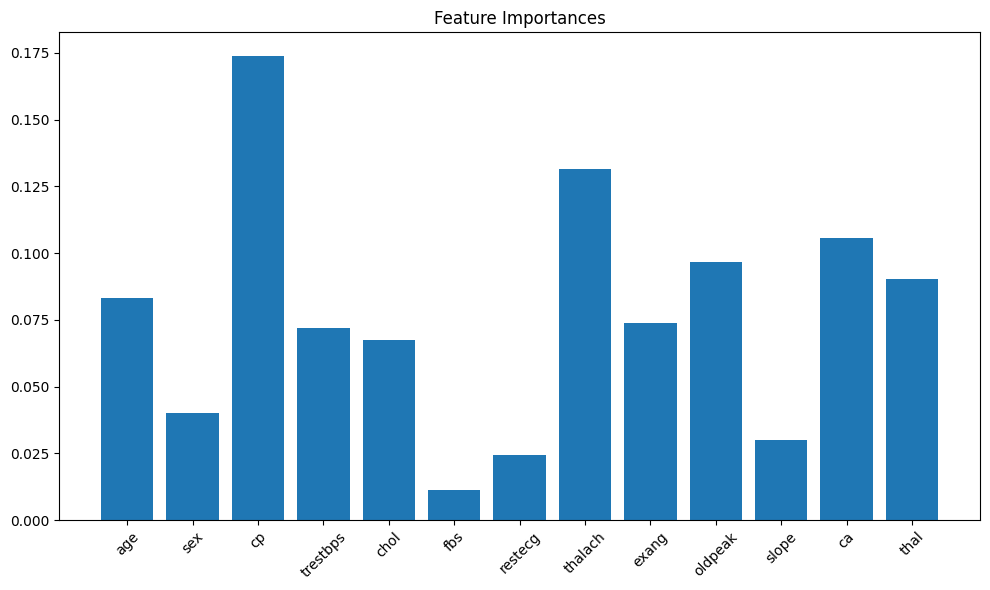

In [9]:
# 9. Feature importances
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.title("Feature Importances")
plt.tight_layout()
plt.savefig('feature_importances.png')
plt.show()

In [10]:
# 10. Cross-validation
dt_cv = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_scores = cross_val_score(dt_cv, X, y, cv=5)
print("Decision Tree CV Accuracy:", dt_scores.mean())

rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_cv, X, y, cv=5)
print("Random Forest CV Accuracy:", rf_scores.mean())


Decision Tree CV Accuracy: 0.7945901639344262
Random Forest CV Accuracy: 0.8278142076502732
